In [4]:
import neural_net as nn
import numpy as np
import audio_utils as au
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
weights = nn.initialize_network(2, 1, 2, 2)
print(weights)
# print(np.array(weights))

[array([[-1.0856306 ,  0.99734545],
       [ 0.2829785 , -1.50629471]]), array([[-2.42667924, -0.42891263]])]


In [3]:
#Confusion matrix
instrs = ["guitar", "clarinet", "flute", "saxophone", "violin"]

def confusion_matrix (actual, desired, outp_length):
    """Gets confusion matrix for a networks output."""
    confusion = np.zeros((outp_length, outp_length))
    for indx in range(len(actual)):
        # print(desired[indx])
        i = desired[indx].tolist().index(1)
        # print(actual[indx])
        j = actual[indx].argmax()
        confusion[i][j] += 1
    return confusion

def print_cc_info(cc, data_length, categories):
    sum1, sum2 = 0, 0
    class_list = []
    for i in range(len(cc)):
        for j in range(len(cc[i])):
            if j == i: 
                sum1 += cc[i][j]
                class_list.append(cc[i][j])
            sum2 += cc[i][j]
    print("This NN got correct ", sum1, " out of ", sum2, " tests")
    print("which is ", str(sum1/sum2)[:5])
    for i in range(len(categories)):
        print("For", categories[i], ", This NN classified", class_list[i], " out of ", data_length)
        print("which is ", str(class_list[i]/data_length)[:5])

Testing the neural network on the data from ps6. Looks like it does pretty well!

In [ ]:
def load_data(filename):
    data = np.loadtxt(filename,delimiter=',')
    inputs = []
    outputs = []
    for line in data:
        inputs.append(line[:-1])
        output = [0] * 10
        output[int(line[-1])] = 1
        outputs.append(output)
    return (np.array(inputs), np.array(outputs))

(test_inp, test_out) = load_data("data/optdigits.tra")

nn.initialize_network(test_inp.T.shape[0], test_out.T.shape[0], 2, 10)
nn.train_network(test_inp.T, test_out.T, nn.update_weights, 50, 0.01)
actual = nn.predict_network(test_inp.T, nn.logistic)
cc = confusion_matrix(actual.T, test_out, test_out.T.shape[0])
print(cc)




Now testing the neural network on the zero-crossing rate and spectral centroid. It does pretty poorly. 

Testing the neural network on the ratio of spectral centroid to zero-crossing rate. Still does pretty poorly.

In [20]:
fund_data = [np.loadtxt("reps/guitar_funds.txt"), np.loadtxt("reps/clarinet_funds.txt"), np.loadtxt("reps/flute_funds.txt"), np.loadtxt("reps/saxophone_funds.txt"), np.loadtxt("reps/violin_funds.txt")]
sc_data = [np.loadtxt("reps/guitar_centroid.txt"), np.loadtxt("reps/clarinet_centroid.txt"), np.loadtxt("reps/flute_centroid.txt"), np.loadtxt("reps/saxophone_centroid.txt"), np.loadtxt("reps/violin_centroid.txt")]

scf_inp = []
scf_inputs = []
scf_outputs = []
for i in range(50):
    for j in range(5):
        scf_inputs = []
        scf_output = [0]*5
        scf_inputs.append(sc_data[j][i]/fund_data[j][i])
        scf_output[j] = 1
        scf_outputs.append(scf_output)
        scf_inp.append(scf_inputs)

scf_inp = np.array(scf_inp)
scf_out = np.array(scf_outputs)
nn.initialize_network(scf_inp.T.shape[0], scf_out.T.shape[0], 2, 5)
nn.train_network(scf_inp.T, scf_out.T, nn.update_weights, 300, 0.01)
real = nn.predict_network(scf_inp.T, nn.logistic)
cm = confusion_matrix(real.T, scf_out, scf_out.T.shape[0])
print(cm)
print_cc_info(cm, 50, instrs)

Iteration:  0
Iteration:  1
Iteration:  2
Iteration:  3
Iteration:  4
Iteration:  5
Iteration:  6
Iteration:  7
Iteration:  8
Iteration:  9
Iteration:  10
Iteration:  11
Iteration:  12
Iteration:  13
Iteration:  14
Iteration:  15
Iteration:  16
Iteration:  17
Iteration:  18
Iteration:  19
Iteration:  20
Iteration:  21
Iteration:  22
Iteration:  23
Iteration:  24
Iteration:  25
Iteration:  26
Iteration:  27
Iteration:  28
Iteration:  29
Iteration:  30
Iteration:  31
Iteration:  32
Iteration:  33
Iteration:  34
Iteration:  35
Iteration:  36
Iteration:  37
Iteration:  38
Iteration:  39
Iteration:  40
Iteration:  41
Iteration:  42
Iteration:  43
Iteration:  44
Iteration:  45
Iteration:  46
Iteration:  47
Iteration:  48
Iteration:  49
Iteration:  50
Iteration:  51
Iteration:  52
Iteration:  53
Iteration:  54
Iteration:  55
Iteration:  56
Iteration:  57
Iteration:  58
Iteration:  59
Iteration:  60
Iteration:  61
Iteration:  62
Iteration:  63
Iteration:  64
Iteration:  65
Iteration:  66
Itera

In [23]:
fund_data = [np.loadtxt("reps/guitar_funds.txt"), np.loadtxt("reps/clarinet_funds.txt"), np.loadtxt("reps/flute_funds.txt"), np.loadtxt("reps/saxophone_funds.txt"), np.loadtxt("reps/violin_funds.txt")]
sc_data = [np.loadtxt("reps/guitar_centroid.txt"), np.loadtxt("reps/clarinet_centroid.txt"), np.loadtxt("reps/flute_centroid.txt"), np.loadtxt("reps/saxophone_centroid.txt"), np.loadtxt("reps/violin_centroid.txt")]
zcr_data = [np.loadtxt("reps/guitar_zcr.txt"), np.loadtxt("reps/clarinet_zcr.txt"), np.loadtxt("reps/flute_zcr.txt"), np.loadtxt("reps/saxophone_zcr.txt"), np.loadtxt("reps/violin_zcr.txt")]

scfz_inp = []
scfz_inputs = []
scfz_outputs = []
for i in range(50):
    for j in range(5):
        scfz_inputs = []
        scfz_output = [0]*5
        scfz_inputs.append(sc_data[j][i]/fund_data[j][i])
        scfz_inputs.append(zcr_data[j][i])
        scfz_output[j] = 1
        scfz_outputs.append(scfz_output)
        scfz_inp.append(scfz_inputs)

scfz_inp = np.array(scfz_inp)
# print(scfz_inp.T)
scfz_out = np.array(scfz_outputs)
nn.initialize_network(scfz_inp.T.shape[0], scfz_out.T.shape[0], 2, 5)
nn.train_network(scfz_inp.T, scfz_out.T, nn.update_weights, 300, 0.01)
real = nn.predict_network(scfz_inp.T, nn.logistic)
cm = confusion_matrix(real.T, scfz_out, scfz_out.T.shape[0])
print(cm)
print_cc_info(cm, 50, instrs)

Iteration:  0
Iteration:  1
Iteration:  2
Iteration:  3
Iteration:  4
Iteration:  5
Iteration:  6
Iteration:  7
Iteration:  8
Iteration:  9
Iteration:  10
Iteration:  11
Iteration:  12
Iteration:  13
Iteration:  14
Iteration:  15
Iteration:  16
Iteration:  17
Iteration:  18
Iteration:  19
Iteration:  20
Iteration:  21
Iteration:  22
Iteration:  23
Iteration:  24
Iteration:  25
Iteration:  26
Iteration:  27
Iteration:  28
Iteration:  29
Iteration:  30
Iteration:  31
Iteration:  32
Iteration:  33
Iteration:  34
Iteration:  35
Iteration:  36
Iteration:  37
Iteration:  38
Iteration:  39
Iteration:  40
Iteration:  41
Iteration:  42
Iteration:  43
Iteration:  44
Iteration:  45
Iteration:  46
Iteration:  47
Iteration:  48
Iteration:  49
Iteration:  50
Iteration:  51
Iteration:  52
Iteration:  53
Iteration:  54
Iteration:  55
Iteration:  56
Iteration:  57
Iteration:  58
Iteration:  59
Iteration:  60
Iteration:  61
Iteration:  62
Iteration:  63
Iteration:  64
Iteration:  65
Iteration:  66
Itera

In [26]:
fund_data = [np.loadtxt("reps/guitar_funds.txt"), np.loadtxt("reps/clarinet_funds.txt"), np.loadtxt("reps/flute_funds.txt"), np.loadtxt("reps/saxophone_funds.txt"), np.loadtxt("reps/violin_funds.txt")]
sc_data = [np.loadtxt("reps/guitar_centroid.txt"), np.loadtxt("reps/clarinet_centroid.txt"), np.loadtxt("reps/flute_centroid.txt"), np.loadtxt("reps/saxophone_centroid.txt"), np.loadtxt("reps/violin_centroid.txt")]
zcr_data = [np.loadtxt("reps/guitar_zcr.txt"), np.loadtxt("reps/clarinet_zcr.txt"), np.loadtxt("reps/flute_zcr.txt"), np.loadtxt("reps/saxophone_zcr.txt"), np.loadtxt("reps/violin_zcr.txt")]

scfz_inp = []
scfz_inputs = []
scfz_outputs = []
for i in range(50):
    for j in range(5):
        scfz_inputs = []
        scfz_output = [0]*5
        scfz_inputs.append(sc_data[j][i]/(fund_data[j][i]))
        scfz_inputs.append(zcr_data[j][i])
        scfz_inputs.append(f_data[j][i][0]/np.max(np.array(f_data[j][i])))
        scfz_output[j] = 1
        scfz_outputs.append(scfz_output)
        scfz_inp.append(scfz_inputs)

scfz_inp = np.array(scfz_inp)
# print(scfz_inp.T)
scfz_out = np.array(scfz_outputs)
nn.initialize_network(scfz_inp.T.shape[0], scfz_out.T.shape[0], 2, 5)
nn.train_network(scfz_inp.T, scfz_out.T, nn.update_weights, 300, 0.01)
real = nn.predict_network(scfz_inp.T, nn.logistic)
cm_1 = confusion_matrix(real.T, scfz_out, scfz_out.T.shape[0])
print(cm_1)
print_cc_info(cm_1, 50, instrs)

Iteration:  0
Iteration:  1
Iteration:  2
Iteration:  3
Iteration:  4
Iteration:  5
Iteration:  6
Iteration:  7
Iteration:  8
Iteration:  9
Iteration:  10
Iteration:  11
Iteration:  12
Iteration:  13
Iteration:  14
Iteration:  15
Iteration:  16
Iteration:  17
Iteration:  18
Iteration:  19
Iteration:  20
Iteration:  21
Iteration:  22
Iteration:  23
Iteration:  24
Iteration:  25
Iteration:  26
Iteration:  27
Iteration:  28
Iteration:  29
Iteration:  30
Iteration:  31
Iteration:  32
Iteration:  33
Iteration:  34
Iteration:  35
Iteration:  36
Iteration:  37
Iteration:  38
Iteration:  39
Iteration:  40
Iteration:  41
Iteration:  42
Iteration:  43
Iteration:  44
Iteration:  45
Iteration:  46
Iteration:  47
Iteration:  48
Iteration:  49
Iteration:  50
Iteration:  51
Iteration:  52
Iteration:  53
Iteration:  54
Iteration:  55
Iteration:  56
Iteration:  57
Iteration:  58
Iteration:  59
Iteration:  60
Iteration:  61
Iteration:  62
Iteration:  63
Iteration:  64
Iteration:  65
Iteration:  66
Itera

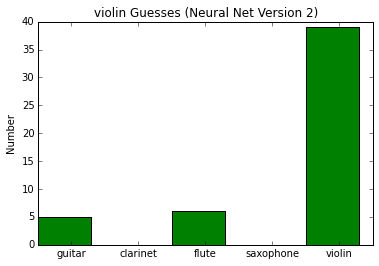

In [33]:
indexes = (0, 1, 2, 3, 4)

plt.bar(indexes, cm[4], width=.8, color='g')

plt.ylabel('Number')
plt.title(instrs[4] + " Guesses (Neural Net Version 2)")
plt.xticks([0.5, 1.5, 2.5, 3.5, 4.5], instrs)
plt.show()

# Testing the neural network on the harmonic information. 

Looks like it can classify guitars pretty well based on the harmonic information, but not very well for the other instruments. 

In [5]:
h_data = []
instrs = ["guitar", "clarinet", "flute", "saxophone", "violin"]
ind = 0
"""
for instr in instrs:
    h_data.append([])
    infile = open("reps/" + instr + "_harmonics.txt", 'r')
    for line in infile:
        ex = []
        for i in line.split(','):
            ex.append( float(i.strip()) )
        h_data[ind].append(ex)
    ind += 1
"""
for instr in instrs:
    h_data.append(au.fetch_harmonic_rep(instr))

#print(h_data)
h_inp = []
h_outputs = []
for i in range(50):
    for j in range(5):
        h_output = [0]*5
        h_output[j] = 1
        h_outputs.append(h_output)
        h_inp.append(np.array(h_data[j][i]))

h_inp = np.array(h_inp)
h_out = np.array(h_outputs)

nn.initialize_network(h_inp.T.shape[0], h_out.T.shape[0], 2, 5)
nn.set_hidden_units(1, 6)
nn.train_network(h_inp.T, h_out.T, nn.update_weights, 200, 0.01)
real = nn.predict_network(h_inp.T, nn.logistic)
cm_h = confusion_matrix(real.T, h_out, h_out.T.shape[0])
print(cm_h)
print_cc_info(cm_h, 50, instrs)

Iteration:  0
Iteration:  1
Iteration:  2
Iteration:  3
Iteration:  4
Iteration:  5
Iteration:  6
Iteration:  7
Iteration:  8
Iteration:  9
Iteration:  10
Iteration:  11
Iteration:  12
Iteration:  13
Iteration:  14
Iteration:  15
Iteration:  16
Iteration:  17
Iteration:  18
Iteration:  19
Iteration:  20
Iteration:  21
Iteration:  22
Iteration:  23
Iteration:  24
Iteration:  25
Iteration:  26
Iteration:  27
Iteration:  28
Iteration:  29
Iteration:  30
Iteration:  31
Iteration:  32
Iteration:  33
Iteration:  34
Iteration:  35
Iteration:  36
Iteration:  37
Iteration:  38
Iteration:  39
Iteration:  40
Iteration:  41
Iteration:  42
Iteration:  43
Iteration:  44
Iteration:  45
Iteration:  46
Iteration:  47
Iteration:  48
Iteration:  49
Iteration:  50
Iteration:  51
Iteration:  52
Iteration:  53
Iteration:  54
Iteration:  55
Iteration:  56
Iteration:  57
Iteration:  58
Iteration:  59
Iteration:  60
Iteration:  61
Iteration:  62
Iteration:  63
Iteration:  64
Iteration:  65
Iteration:  66
Itera

# Now testing the neural network on the spectral flux. 

It does decently well, getting around 50% correct across all instruments. It is especially bad at classifying the saxophone (it usually classifies it as a violin), which makes sense given that the spectrum for both instruments looks quite similar (aside from the attack portion of the spectrum). 

When we test the network on the normalized flux, it does much better! It gets around 75% correct. 

In [6]:
f_data = []
instrs = ["guitar", "clarinet", "flute", "saxophone", "violin"]
ind = 0
"""
for instr in instrs:
    f_data.append([])
    infile = open("reps/" + instr + "_nflux.txt", 'r')
    for line in infile:
        ex = []
        for i in line.split(','):
            ex.append( float(i.strip()) )
        f_data[ind].append(ex)
    ind += 1
"""
for instr in instrs:
    f_data.append(au.fetch_nflux_rep(instr))

f_inp = []
f_outputs = []
for i in range(50):
    for j in range(5):
        f_output = [0]*5
        f_output[j] = 1
        f_outputs.append(f_output)
        f_inp.append(np.array(f_data[j][i]))

f_inp = np.array(f_inp)
f_out = np.array(f_outputs)

nn.initialize_network(f_inp.T.shape[0], f_out.T.shape[0], 3, 5)
nn.set_hidden_units(1, 10)
nn.train_network(f_inp.T, f_out.T, nn.update_weights, 300, 0.01)
real = nn.predict_network(f_inp.T, nn.logistic)
cm = confusion_matrix(real.T, f_out, f_out.T.shape[0])
print(cm)
print_cc_info(cm, 50, instrs)

Iteration:  0
Iteration:  1
Iteration:  2
Iteration:  3
Iteration:  4
Iteration:  5
Iteration:  6
Iteration:  7
Iteration:  8
Iteration:  9
Iteration:  10
Iteration:  11
Iteration:  12
Iteration:  13
Iteration:  14
Iteration:  15
Iteration:  16
Iteration:  17
Iteration:  18
Iteration:  19
Iteration:  20
Iteration:  21
Iteration:  22
Iteration:  23
Iteration:  24
Iteration:  25
Iteration:  26
Iteration:  27
Iteration:  28
Iteration:  29
Iteration:  30
Iteration:  31
Iteration:  32
Iteration:  33
Iteration:  34
Iteration:  35
Iteration:  36
Iteration:  37
Iteration:  38
Iteration:  39
Iteration:  40
Iteration:  41
Iteration:  42
Iteration:  43
Iteration:  44
Iteration:  45
Iteration:  46
Iteration:  47
Iteration:  48
Iteration:  49
Iteration:  50
Iteration:  51
Iteration:  52
Iteration:  53
Iteration:  54
Iteration:  55
Iteration:  56
Iteration:  57
Iteration:  58
Iteration:  59
Iteration:  60
Iteration:  61
Iteration:  62
Iteration:  63
Iteration:  64
Iteration:  65
Iteration:  66
Itera

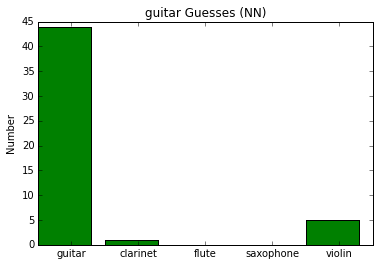

In [7]:

indexes = (0, 1, 2, 3, 4)

plt.bar(indexes, cm[0], width=.8, color='g')

plt.ylabel('Number')
plt.title(instrs[0] + " Guesses (NN)")
plt.xticks([0.5, 1.5, 2.5, 3.5, 4.5], instrs)
plt.show()

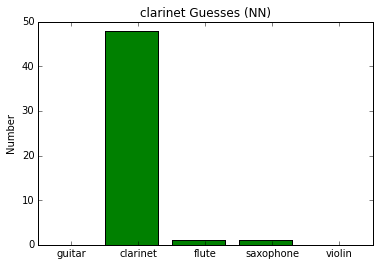

In [8]:
plt.bar(indexes, cm[1], width=.8, color='g')

plt.ylabel('Number')
plt.title(instrs[1] + " Guesses (NN)")
plt.xticks([0.5, 1.5, 2.5, 3.5, 4.5], instrs)
plt.show()

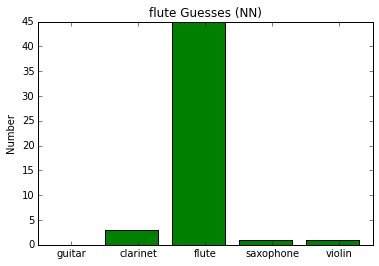

In [9]:
plt.bar(indexes, cm[2], width=.8, color='g')

plt.ylabel('Number')
plt.title(instrs[2] + " Guesses (NN)")
plt.xticks([0.5, 1.5, 2.5, 3.5, 4.5], instrs)
plt.show()

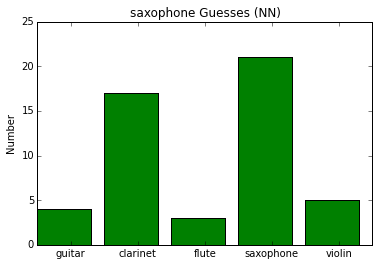

In [10]:
plt.bar(indexes, cm[3], width=.8, color='g')

plt.ylabel('Number')
plt.title(instrs[3] + " Guesses (NN)")
plt.xticks([0.5, 1.5, 2.5, 3.5, 4.5], instrs)
plt.show()

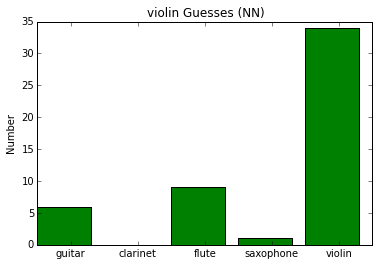

In [11]:
plt.bar(indexes, cm[4], width=.8, color='g')

plt.ylabel('Number')
plt.title(instrs[4] + " Guesses (NN)")
plt.xticks([0.5, 1.5, 2.5, 3.5, 4.5], instrs)
plt.show()

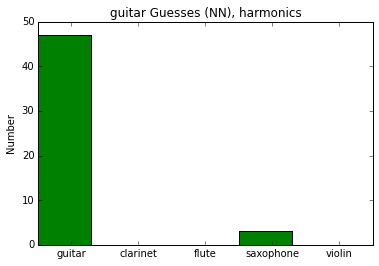

In [13]:

indexes = (0, 1, 2, 3, 4)

plt.bar(indexes, cm_h[0], width=.8, color='g')

plt.ylabel('Number')
plt.title(instrs[0] + " Guesses (NN), harmonics")
plt.xticks([0.5, 1.5, 2.5, 3.5, 4.5], instrs)
plt.show()

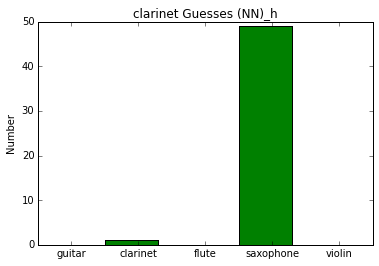

In [14]:
plt.bar(indexes, cm_h[1], width=.8, color='g')

plt.ylabel('Number')
plt.title(instrs[1] + " Guesses (NN)_h")
plt.xticks([0.5, 1.5, 2.5, 3.5, 4.5], instrs)
plt.show()

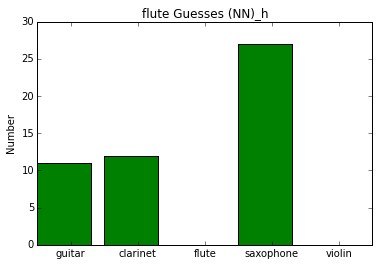

In [15]:
plt.bar(indexes, cm_h[2], width=.8, color='g')

plt.ylabel('Number')
plt.title(instrs[2] + " Guesses (NN)_h")
plt.xticks([0.5, 1.5, 2.5, 3.5, 4.5], instrs)
plt.show()

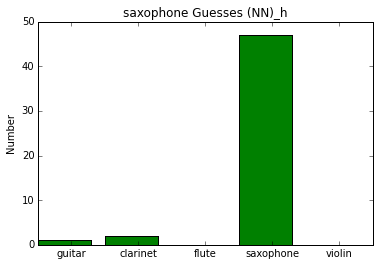

In [16]:
plt.bar(indexes, cm_h[3], width=.8, color='g')

plt.ylabel('Number')
plt.title(instrs[3] + " Guesses (NN)_h")
plt.xticks([0.5, 1.5, 2.5, 3.5, 4.5], instrs)
plt.show()

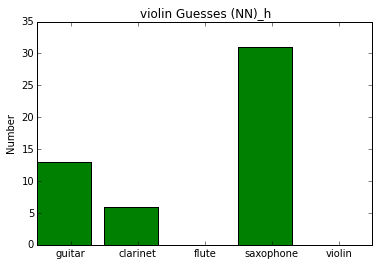

In [17]:
plt.bar(indexes, cm_h[4], width=.8, color='g')

plt.ylabel('Number')
plt.title(instrs[4] + " Guesses (NN)_h")
plt.xticks([0.5, 1.5, 2.5, 3.5, 4.5], instrs)
plt.show()